In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

## Part-1: Data Exploration and Preprocessing

In [2]:
df = pd.read_csv('./dataset/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
new_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
new_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


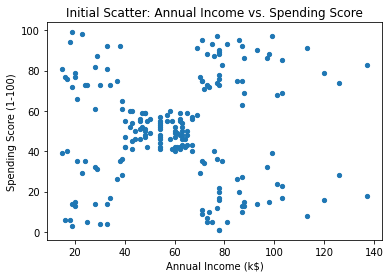

In [10]:
new_df.columns = ['Income', 'Score']

scaler = StandardScaler()
X = scaler.fit_transform(new_df.values)

plt.figure()
plt.scatter(new_df['Income'], new_df['Score'], s=18)
plt.title('Initial Scatter: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Part-2: K-Means

In [11]:
wcss = []
K_RANGE = range(1, 11)
for k in K_RANGE:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

In [12]:
wcss

[400.0,
 273.6688866264201,
 157.7040081503595,
 109.22822707921347,
 65.56840815571681,
 60.13287487193422,
 49.66824483736798,
 37.319122878338824,
 32.49508119910091,
 30.05932269404221]

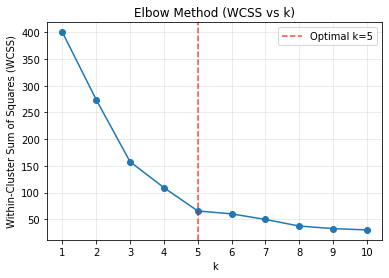

In [21]:
plt.figure()
plt.plot(list(K_RANGE), wcss, marker='o')
plt.title('Elbow Method (WCSS vs k)')
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(list(K_RANGE))
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Optimal k=5')
plt.legend()
plt.show()

In [17]:
k_elbow = 5

In [18]:
kmeans = KMeans(n_clusters=k_elbow, n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

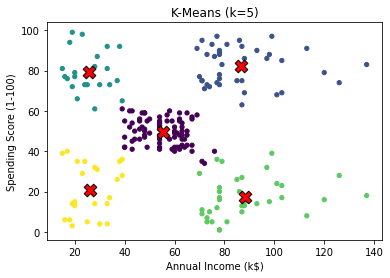

In [20]:
centroids_orig = scaler.inverse_transform(centroids)

plt.figure()
plt.scatter(new_df['Income'], new_df['Score'], c=kmeans_labels, s=18)
plt.scatter(centroids_orig[:,0], centroids_orig[:,1], marker='X', s=160, edgecolor='k', c='red')
plt.title(f'K-Means (k={k_elbow})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [22]:
km_sil = silhouette_score(X, kmeans_labels) if len(set(kmeans_labels)) > 1 else np.nan
print('K-Means silhouette score:', km_sil)

K-Means silhouette score: 0.5546571631111091


## Part-3: Agglomerative Hierarchical Clustering

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

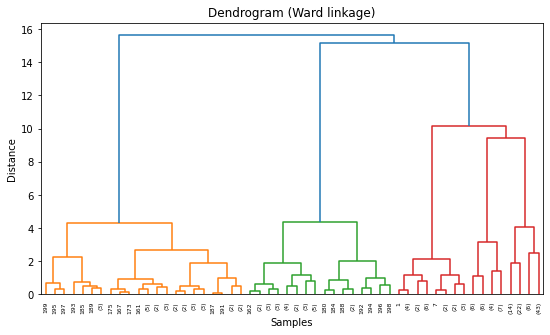

In [24]:
Z = linkage(X, method='ward')
plt.figure(figsize=(9, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [25]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [26]:
labels = hc.fit_predict(new_df[['Income', 'Score']])

/Users/kashyappatel/anaconda3/envs/ds605/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


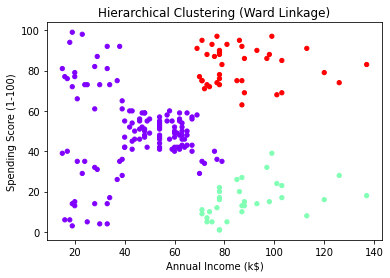

In [27]:
plt.figure()
plt.scatter(new_df['Income'], new_df['Score'], c=labels, cmap='rainbow', s=18)
plt.title("Hierarchical Clustering (Ward Linkage)")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [28]:
ag_sil = silhouette_score(X, labels)
print('Agglomerative silhouette score:', ag_sil)

Agglomerative silhouette score: 0.4610481446570447


## Part-4: DBSCAN Clustering

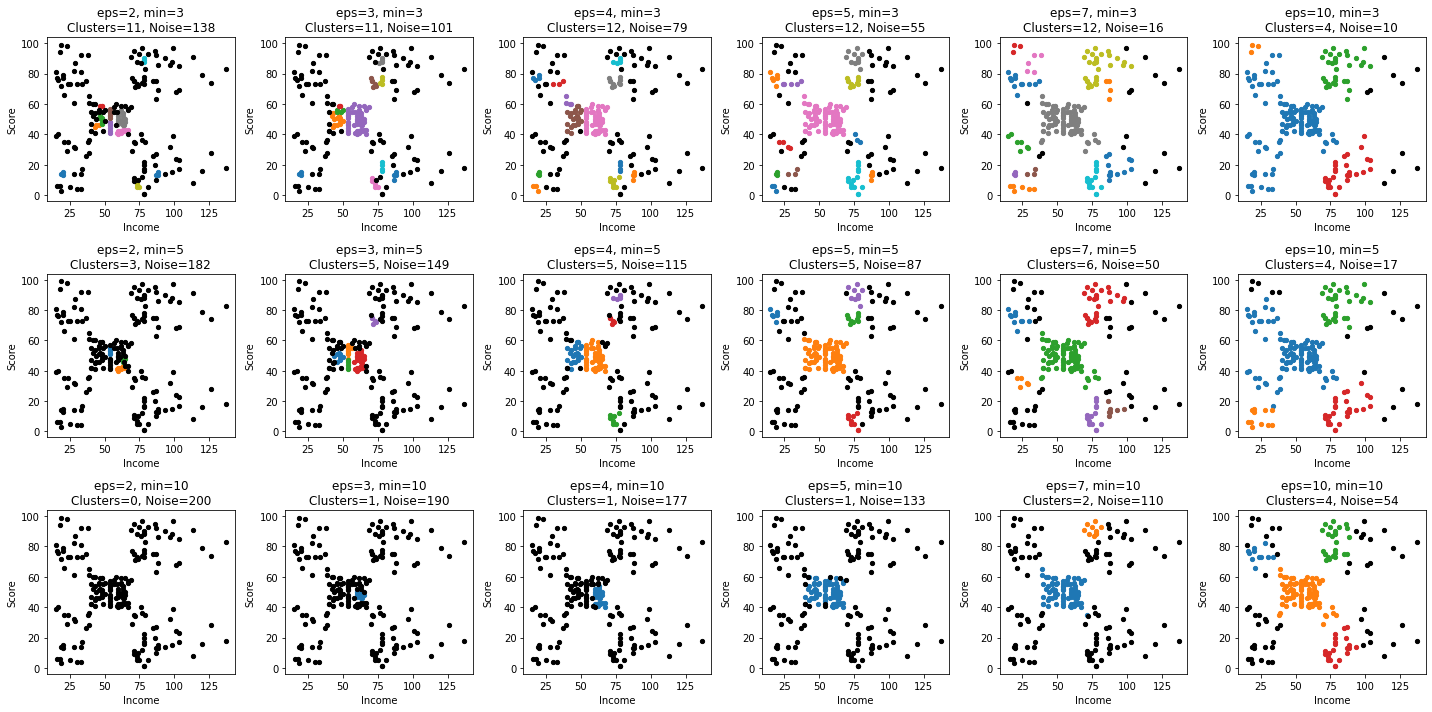

In [ ]:
eps_values = [2, 3, 4, 5, 7, 10]
min_samples_values = [3, 5, 10]

results = []
fig, axes = plt.subplots(len(min_samples_values), len(eps_values), figsize=(20, 10))

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        ax = axes[i, j]
        
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(new_df[['Income', 'Score']])
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:
            sil = silhouette_score(new_df[['Income', 'Score']][labels != -1],
                                   labels[labels != -1])
        else:
            sil = np.nan
        
        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "n_clusters": n_clusters,
            "n_noise": n_noise,
            "silhouette_score": sil
        })
        
        unique_labels = set(labels)
        for label in unique_labels:
            if label == -1:
                ax.scatter(new_df['Income'][labels == label],
                           new_df['Score'][labels == label],
                           c='black', s=18)
            else:
                ax.scatter(new_df['Income'][labels == label],
                           new_df['Score'][labels == label],
                           s=18, label=f'Cluster {label}')
        
        ax.set_title(f"eps={eps}, min={min_samples}\nClusters={n_clusters}, Noise={n_noise}")
        ax.set_xlabel("Income")
        ax.set_ylabel("Score")

plt.tight_layout()
plt.show()

In [36]:
results_df = pd.DataFrame(results)
results_df

,eps,min_samples,n_clusters,n_noise,silhouette_score
0,2,3,11,138,0.596460
1,3,3,11,101,0.409702
2,4,3,12,79,0.485702
3,5,3,12,55,0.445977
4,7,3,12,16,0.408613
5,10,3,4,10,0.395090
6,2,5,3,182,0.682078
7,3,5,5,149,0.465309
8,4,5,5,115,0.525914
9,5,5,5,87,0.618195
